# Part 1: Exploratory Data Analysis of Login.json Timestamps

In [4]:
#Read logins.json file

import pandas as pd

#help(pd.read_json)

df_part1 = pd.read_json('logins.json', keep_default_dates=True)
df_part1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## 1. Summary Statistics

In [5]:
#find missing values
df_part1.isnull().sum()

login_time    0
dtype: int64

No missing values

In [6]:
df_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Only contains one date time column

In [7]:
df_part1.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


## 2. Data Munging (Adding some columns for future use/analysis)

Since each login time can be recorded as a single count of login irrespective of user_id, let's add a column called login_count

In [12]:
import numpy as np
df_part1['login_count'] = 1

In [13]:
df_part1.head()

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


let's extract each component of the date into its own column i.e year, month, day , time into separate columns

In [22]:
import datetime as dt
df_part1['year'] = df_part1['login_time'].dt.year
df_part1['month'] = df_part1['login_time'].dt.month
df_part1['day'] = df_part1['login_time'].dt.day
df_part1['time'] = df_part1['login_time'].dt.time
df_part1.head()

,login_time,login_count,year,month,day,time
0,1970-01-01 20:13:18,1,1970,1,1,20:13:18
1,1970-01-01 20:16:10,1,1970,1,1,20:16:10
2,1970-01-01 20:16:37,1,1970,1,1,20:16:37
3,1970-01-01 20:16:36,1,1970,1,1,20:16:36
4,1970-01-01 20:26:21,1,1970,1,1,20:26:21


In [29]:
# lineplot of login time
import seaborn as sns
import matplotlib.pyplot as plt


## 3. Visualization
### 3.1 Aggregate login count for every 15 min intervals

/var/folders/m2/ycqz5h_d2y55049kl0cst9rm0000gn/T/ipykernel_3564/1567702650.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_15min = df_part1.set_index('login_time').resample('15T')['login_count'].sum().reset_index()


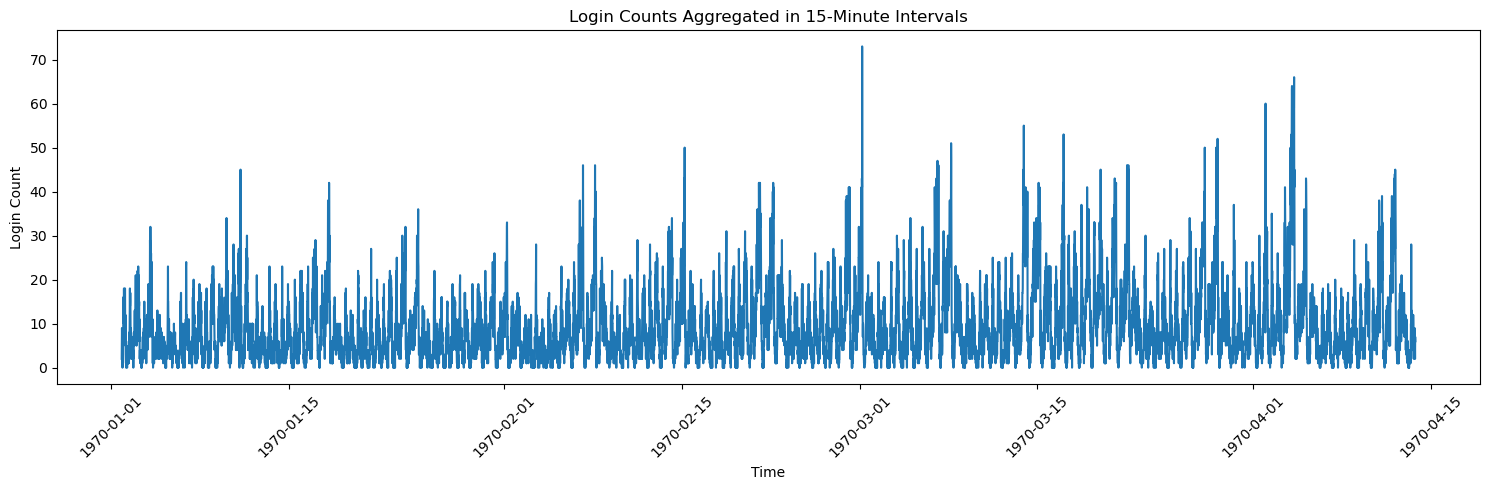

In [30]:
# Aggregate login counts in 15-minute intervals
df_15min = df_part1.set_index('login_time').resample('15T')['login_count'].sum().reset_index()

# Visualize the aggregated time series
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_15min, x='login_time', y='login_count')
plt.title('Login Counts Aggregated in 15-Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
df_15min.head()

,login_time,login_count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


### 3.2 Visualize daily login patter on an average for every 15min aggregation

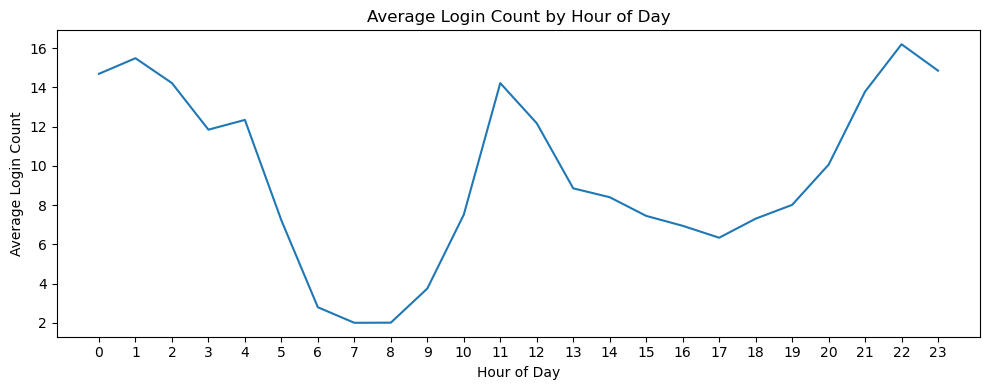

In [34]:

# Describe important features
daily_pattern = df_15min.groupby(df_15min['login_time'].dt.hour)['login_count'].mean()
plt.figure(figsize=(10, 4))
sns.lineplot(x=daily_pattern.index, y=daily_pattern.values)
plt.title('Average Login Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Login Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


#### We notice that the demand is highest during midnight hours (12am) with a steady crashing dip starting 1 am until 7 to 8 am , starting 8 am, there is a steady rise in demand until 11 am, from then there is a dip again until 5 pm with an increase in demand at 12 am

The code above performs exploratory data analysis on login timestamps from a JSON file. It reads the data into a pandas DataFrame (`df_part1`), checks for missing values, and summarizes the dataset. The DataFrame contains one main column, `login_time`, which records the timestamp of each login. Additional columns are created to extract the year, month, day, and time components from each timestamp. A `login_count` column is added to represent each login event as a count of 1. This structure enables further analysis, such as aggregating logins over time intervals and visualizing patterns in user activity.

To analyze temporal patterns, the code aggregates login counts into 15-minute intervals using pandas' `resample` method. This produces a new DataFrame (`df_15min`) where each row represents the total number of logins within a 15-minute window. The aggregated data is then visualized to reveal trends and periodicity in user logins. Additionally, the code checks for missing intervals to identify any gaps in the data, ensuring the quality and completeness of the time series analysis.

## 4. Data Quality Issues

In [36]:

# Check for data quality issues
missing_intervals = df_15min['login_count'].isnull().sum()
print(f"Number of missing 15-minute intervals: {missing_intervals}")
if missing_intervals > 0:
    print("Missing intervals > 0, there may be gaps in the data.")
else:
    print("No missing intervals, data appears complete.")

Number of missing 15-minute intervals: 0
No missing intervals, data appears complete.
